# Sklearn을 이용한 pima-indians-diabetes 예측 모델 구현

1. 모델 : 로지스틱 회귀, 랜덤포레스트 모델 이용

In [1]:
import numpy as np 
import pandas as pd


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


데이터를 보니 768행 9열이 존재하고 마지막에는 판별을 하는 열이 존재합니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data.info()함수를 통해서 데이터가 어떤 종류이고 값들의 데이터타입을 파악합니다.


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측값이 존재하는지 파악하기위해서 data.isnull().sum()을 통해서 결측값의 개수를 파악합니다.

이번 데이터 같은 경우에는 결측값이 존재하지 않는다는 것을 알 수 있습니다. 

count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64
count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64


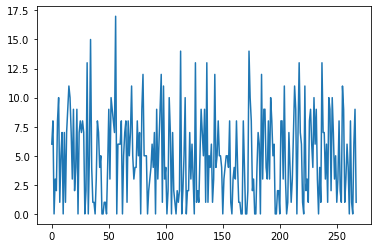

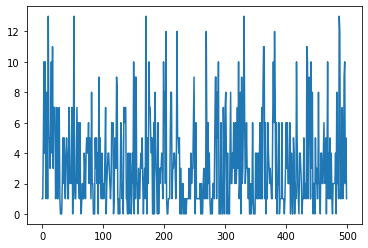

In [6]:
Death_Preg = data[data['Outcome'] == 1]['Pregnancies']
Alive_Preg = data[data['Outcome'] == 0]['Pregnancies']
print(Death_Preg.describe())
print(Alive_Preg.describe())
plt.plot(np.arange(0,len(Death_Preg)),Death_Preg)
plt.show()
plt.plot(np.arange(0,len(Alive_Preg)),Alive_Preg)
plt.show()

각 열값과 OutCome 열값에 따라 비교합니다. 1을 죽은거고 0을 생존한다는 하에 판단하였습니다.
describe() 함수는 각 열값의 최댓값 최솟값 평균 표준편차 등등을 다 나타내주는 열값입니다.


count    268.000000
mean      70.824627
std       21.491812
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64
count    500.000000
mean      68.184000
std       18.063075
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64


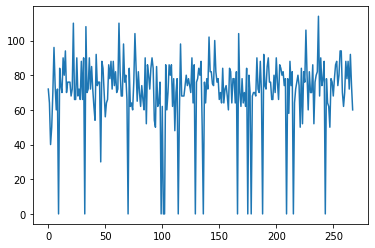

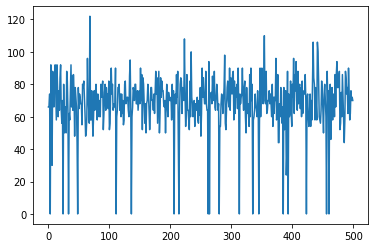

In [7]:
Death_BloodPressure= data[data['Outcome'] == 1]['BloodPressure']
Alive_BloodPressure = data[data['Outcome'] == 0]['BloodPressure']
print(Death_BloodPressure.describe())
print(Alive_BloodPressure.describe())
plt.plot(np.arange(0,len(Death_BloodPressure)),Death_BloodPressure)
plt.show()
plt.plot(np.arange(0,len(Alive_BloodPressure)),Alive_BloodPressure)
plt.show()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64
count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64


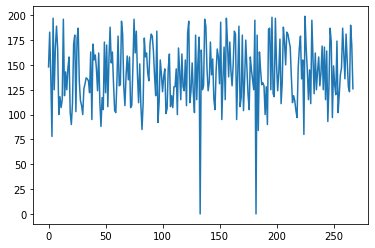

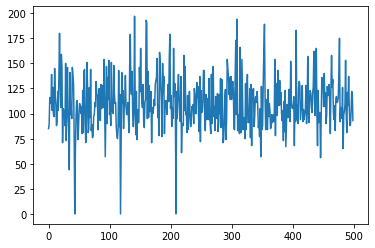

In [8]:
Death_Glucose = data[data['Outcome'] == 1]['Glucose']
Alive_Glucose = data[data['Outcome'] == 0]['Glucose']
print(Death_Glucose.describe())
print(Alive_Glucose.describe())
plt.plot(np.arange(0,len(Death_Glucose)),Death_Glucose)
plt.show()
plt.plot(np.arange(0,len(Alive_Glucose)),Alive_Glucose)
plt.show()

count    268.000000
mean      22.164179
std       17.679711
min        0.000000
25%        0.000000
50%       27.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64
count    500.000000
mean      19.664000
std       14.889947
min        0.000000
25%        0.000000
50%       21.000000
75%       31.000000
max       60.000000
Name: SkinThickness, dtype: float64


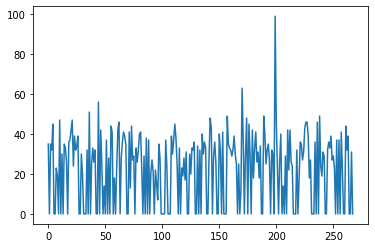

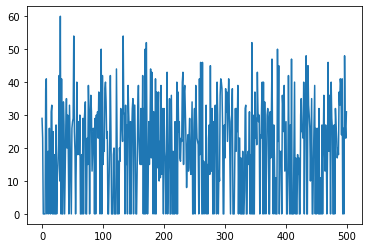

In [11]:
Death_SkinThickness = data[data['Outcome'] == 1]['SkinThickness']
Alive_SkinThickness = data[data['Outcome'] == 0]['SkinThickness']
print(Death_SkinThickness.describe())
print(Alive_SkinThickness.describe())
plt.plot(np.arange(0,len(Death_SkinThickness)),Death_SkinThickness)
plt.show()
plt.plot(np.arange(0,len(Alive_SkinThickness)),Alive_SkinThickness)
plt.show()

count    268.000000
mean     100.335821
std      138.689125
min        0.000000
25%        0.000000
50%        0.000000
75%      167.250000
max      846.000000
Name: Insulin, dtype: float64
count    500.000000
mean      68.792000
std       98.865289
min        0.000000
25%        0.000000
50%       39.000000
75%      105.000000
max      744.000000
Name: Insulin, dtype: float64


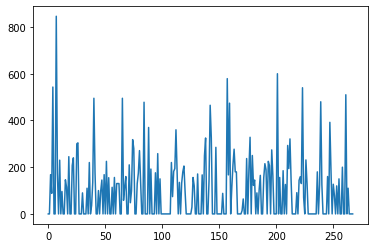

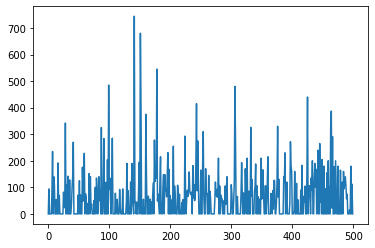

In [9]:
Death_Insulin = data[data['Outcome'] == 1]['Insulin']
Alive_Insulin = data[data['Outcome'] == 0]['Insulin']
print(Death_Insulin.describe())
print(Alive_Insulin.describe())
plt.plot(np.arange(0,len(Death_Insulin)),Death_Insulin)
plt.show()
plt.plot(np.arange(0,len(Alive_Insulin)),Alive_Insulin)
plt.show()

count    268.000000
mean      35.142537
std        7.262967
min        0.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64
count    500.000000
mean      30.304200
std        7.689855
min        0.000000
25%       25.400000
50%       30.050000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64


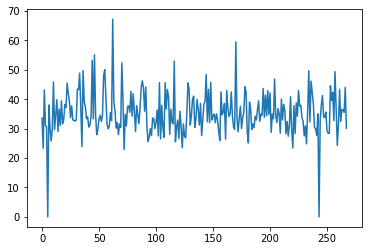

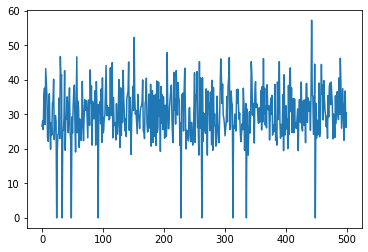

In [10]:
Death_BMI = data[data['Outcome'] == 1]['BMI']
Alive_BMI = data[data['Outcome'] == 0]['BMI']
print(Death_BMI.describe())
print(Alive_BMI.describe())
plt.plot(np.arange(0,len(Death_BMI)),Death_BMI)
plt.show()
plt.plot(np.arange(0,len(Alive_BMI)),Alive_BMI)
plt.show()

count    268.000000
mean       0.550500
std        0.372354
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
count    500.000000
mean       0.429734
std        0.299085
min        0.078000
25%        0.229750
50%        0.336000
75%        0.561750
max        2.329000
Name: DiabetesPedigreeFunction, dtype: float64


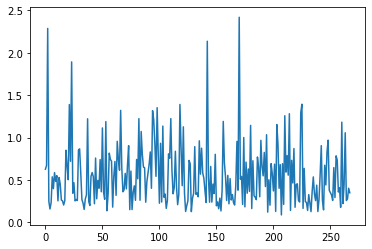

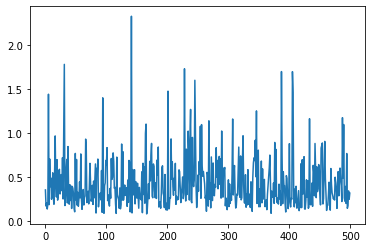

In [12]:
Death_DiabetesPedigreeFunction = data[data['Outcome'] == 1]['DiabetesPedigreeFunction']
Alive_DiabetesPedigreeFunction = data[data['Outcome'] == 0]['DiabetesPedigreeFunction']
print(Death_DiabetesPedigreeFunction.describe())
print(Alive_DiabetesPedigreeFunction.describe())
plt.plot(np.arange(0,len(Death_DiabetesPedigreeFunction)),Death_DiabetesPedigreeFunction)
plt.show()
plt.plot(np.arange(0,len(Alive_DiabetesPedigreeFunction)),Alive_DiabetesPedigreeFunction)
plt.show()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64
count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64


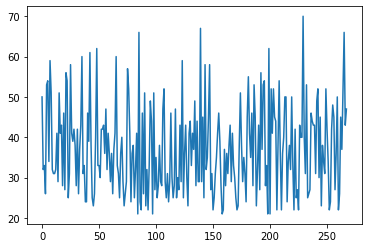

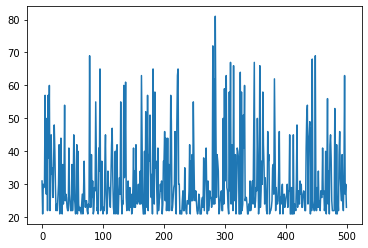

In [13]:
Death_Age = data[data['Outcome'] == 1]['Age']
Alive_Age = data[data['Outcome'] == 0]['Age']
print(Death_Age.describe())
print(Alive_Age.describe())
plt.plot(np.arange(0,len(Death_Age)),Death_Age)
plt.show()
plt.plot(np.arange(0,len(Alive_Age)),Alive_Age)
plt.show()

각 열값을 비교하였을 때 뚜렷한 특징을 판단하기가 힘들다고 생각하여 저희는 HeatMap을 그려서 판단하기로 하였습니다.


In [14]:
data_corr = data.corr()
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


상관계수값을 구하는 공식은 corr()함수를 이용하여 구현합니다.

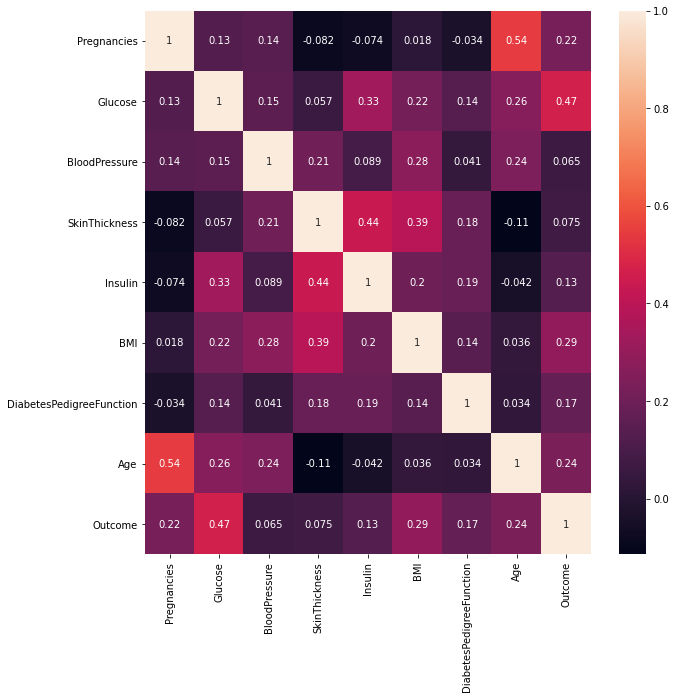

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True)
plt.show()

0에 가까울수록 상관계수값이 적다는 의미로 둘이 따로논다고 생각할 수 있습니다. 저는 그래서 0.1보다 작은 값을 제거하기로 하였습니다.

In [16]:
data_y = data['Outcome']
del data['Outcome']

# 제가 모르고 2번을 눌러서 ;;; 한번 누르면 잘 됩니다.

Sklearn의 로지스틱회귀를 이용하여 알아보니 정확도가 약 70퍼로 나온거로 알 수 있습니다.

결정트리로 모델을 판단하니 기존 데이터와 새로운 데이터가 모두 일치하다는 것을 알 수 있습니다.

In [20]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(data,test_size=0.2,random_state = 42)

In [32]:
train_set.shape

(614, 8)

In [25]:
train_y.shape

(614,)

In [22]:
train_y = train_set['Outcome']
del train_set['Outcome']
test_y = test_set['Outcome']
del test_set['Outcome']

In [23]:
!pip install tensorflow==1.8.0

     |████████████████████████████████| 49.1MB 78kB/s 
     |████████████████████████████████| 3.1MB 21.4MB/s 
     |████████████████████████████████| 890kB 47.8MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=3f2cb2035ddb5a6fb1cc132790bd16988b947d750b1f755a0afb97a7c6586b4f
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.2.1
    Uninstalling bleach-3.2.1:
      Successfully uninstalled bleach-3.2.1
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [26]:
from sklearn.preprocessing import OneHotEncoder
train_y = np.array(train_y).reshape(len(train_y),1)
test_y = np.array(test_y).reshape(len(test_y),1)
encoder = OneHotEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [40]:
s = train_y.toarray()

In [41]:
a = test_y.toarray()

In [29]:
train_y.shape

(614, 2)

In [31]:
train_set = train_set.astype(np.float32)
test_set = test_set.astype(np.float32)

In [33]:
import tensorflow as tf

X = tf.placeholder(tf.float32,shape=[None,8])
Y = tf.placeholder(tf.float32,shape=[None,2])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [73]:
L1 = tf.Variable(tf.random_normal([8,64],stddev=0.01))
L1 = tf.layers.batch_normalization(L1, center=True, scale=True)
W1 = tf.nn.relu(tf.matmul(X,L1))

L2 = tf.Variable(tf.random_normal([64,16],stddev=0.01))
L2 = tf.layers.batch_normalization(L2, center=True, scale=True)
W2 = tf.nn.relu(tf.matmul(W1,L2))

L3 = tf.Variable(tf.random_normal([16,2],stddev=0.01))
L3 = tf.layers.batch_normalization(L3, center=True, scale=True)
model = tf.nn.relu(tf.matmul(W2,L3))



In [92]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0011).minimize(cost)

In [93]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for step in range(6000):
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: train_set, Y: s})
    if step % 300 == 0:
      print(step, "Cost: ", cost_val)
prediction = sess.run(model,feed_dict={X:test_set})
prediction2 = sess.run(model,feed_dict={X:train_set})
print('최적화 완료!')

0 Cost:  0.69298404
300 Cost:  0.50828636
600 Cost:  0.46769828
900 Cost:  0.44512635
1200 Cost:  0.394632
1500 Cost:  0.37783253
1800 Cost:  0.34311756
2100 Cost:  0.30963182
2400 Cost:  0.31434107
2700 Cost:  0.2733595
3000 Cost:  0.31471455
3300 Cost:  0.24798353
3600 Cost:  0.22666359
3900 Cost:  0.31219146
4200 Cost:  0.21276379
4500 Cost:  0.20049815
4800 Cost:  0.2739306
5100 Cost:  0.16776317
5400 Cost:  0.16890286
5700 Cost:  0.15594524
최적화 완료!


In [94]:

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('훈련 정확도:', sess.run(accuracy,
                        feed_dict={X: test_set,
                                   Y: a}))
print('테스트 정확도:', sess.run(accuracy,
                        feed_dict={X: train_set,
                                   Y: s}))
sess.close()

훈련 정확도: 0.6298701
테스트 정확도: 0.9169381
